In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/staff.csv', index_col='empID',
                 thousands=',', parse_dates=['dob', 'join_date'])
df

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 8 columns):
fname         12 non-null object
lname         12 non-null object
sex           12 non-null object
dob           12 non-null datetime64[ns]
position      12 non-null object
department    12 non-null object
salary        12 non-null int64
join_date     12 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 864.0+ bytes


In [4]:
salary_bucket = ['0-15,000', '15,001-30,000', '30,001-45,000', '45,001-60,000', '60,001-75,000', '75,001-90,000', '90000+']
df['salary_group'] = pd.cut(df.salary, 
                            bins=[0, 15000, 30000, 45000, 60000, 75000, 90000, np.inf],
                            labels= salary_bucket,
                            right=True).astype(str).astype('category', categories=salary_bucket, ordered=True)
df.sort_values('salary_group')

C:\Users\ruji-\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


,fname,lname,sex,dob,position,department,salary,join_date,salary_group
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000"
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000"
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000"
171,ณิชา,ประดู่,F,1962-04-03,พนักงานระดับต้น,HR,25000,2017-03-28,"15,001-30,000"
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-45,000"
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-45,000"
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-45,000"
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-45,000"
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-45,000"


In [5]:
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000"
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-45,000"
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000"
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-45,000"
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"75,001-90,000"
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-45,000"
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-45,000"
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000"
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-45,000"


## วิธีที่2

In [6]:
from pandas.api.types import CategoricalDtype
salary_bucket = ['0-15,000', '15,001-30,000', '30,001-45,000', '45,001-60,000', '60,001-75,000', '75,001-90,000', '90000+']
df['salary_group'] = pd.cut(df.salary,
                           bins=[0, 15000, 30000, 45000, 60000, 75000, 90000, np.inf],
                           labels=salary_bucket,
                           right=True).astype(CategoricalDtype(salary_bucket, ordered=True))
df.sort_values('salary_group')

,fname,lname,sex,dob,position,department,salary,join_date,salary_group
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000"
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000"
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000"
171,ณิชา,ประดู่,F,1962-04-03,พนักงานระดับต้น,HR,25000,2017-03-28,"15,001-30,000"
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-45,000"
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-45,000"
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-45,000"
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-45,000"
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-45,000"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 9 columns):
fname           12 non-null object
lname           12 non-null object
sex             12 non-null object
dob             12 non-null datetime64[ns]
position        12 non-null object
department      12 non-null object
salary          12 non-null int64
join_date       12 non-null datetime64[ns]
salary_group    12 non-null category
dtypes: category(1), datetime64[ns](2), int64(1), object(5)
memory usage: 1.2+ KB


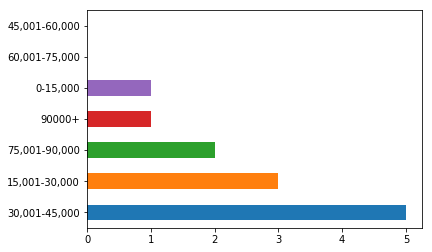

In [8]:
df.salary_group.value_counts().plot.barh()

In [9]:
pd.to_datetime('today').year

2018

In [10]:
df['age'] = pd.to_datetime('today').year - df.dob.dt.year

In [11]:
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age
empID,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",24
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-45,000",50
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",31
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-45,000",27
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"75,001-90,000",44
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-45,000",43
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-45,000",55
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",35
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-45,000",31


In [12]:
df.describe()

,salary,age
count,12.000000,12.000000
mean,44458.333333,39.750000
std,27538.781195,10.779821
min,13000.000000,24.000000
25%,25000.000000,31.000000
50%,37000.000000,39.000000
75%,49375.000000,47.000000
max,101500.000000,56.000000


In [13]:
age_cut = ['20-30', '31-40', '41-50', '51+']
df['age_group'] = pd.cut(df.age,
                        bins= [20, 30, 40, 50, np.inf],
                        labels = age_cut,
                        right=True,
                        include_lowest=True).astype(CategoricalDtype(age_cut, ordered=True))

In [14]:
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age,age_group
empID,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",24,20-30
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-45,000",50,41-50
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",31,31-40
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-45,000",27,20-30
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"75,001-90,000",44,41-50
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-45,000",43,41-50
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-45,000",55,51+
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",35,31-40
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-45,000",31,31-40


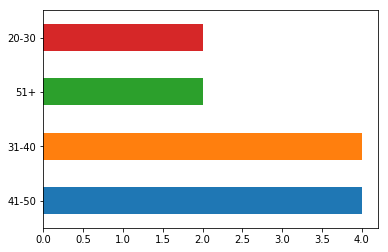

In [15]:
df.age_group.value_counts().plot(kind='barh')

In [16]:
from IPython.display import IFrame
IFrame("https://matplotlib.org/examples/color/named_colors.html", width = 1000, height = 400)

In [17]:
pd.crosstab(df.age_group, df.sex)

sex,F,M
age_group,,
20-30,0,2
41-50,3,1
31-40,4,0
51+,1,1


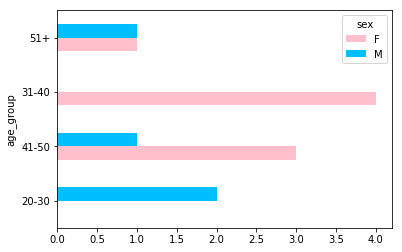

In [18]:
pd.crosstab(df.age_group, df.sex).plot(kind='barh', color=['pink', 'deepskyblue'])

In [19]:
def generation(birthdate) :
    y = birthdate.year
    if 1946<= y <= 1964:
        return 'Baby Boomer'
    elif 1965 <= y <= 1979:
        return 'Gen X'
    elif 1980<= y <= 1994:
        return 'Gen Y'
    elif 1995 <= y <=2012:
        return 'Gen Z'
    else:
        return 'Gen Alpha'

In [20]:
df['gen'] = df.dob.map(lambda d: generation(d)).astype('category',
                                                       categories = ['Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z'],
                                                       ordered=True)

C:\Users\ruji-\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age,age_group,gen
empID,,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",24,20-30,Gen Y
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-45,000",50,41-50,Gen X
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",31,31-40,Gen Y
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-45,000",27,20-30,Gen Y
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"75,001-90,000",44,41-50,Gen X
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-45,000",43,41-50,Gen X
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-45,000",55,51+,Baby Boomer
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",35,31-40,Gen Y
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-45,000",31,31-40,Gen Y


In [22]:
df['gen'] = df.dob.map(lambda d : generation(d)).astype(CategoricalDtype(
                                                       categories = ['Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z'],
                                                       ordered=True))

In [23]:
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age,age_group,gen
empID,,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",24,20-30,Gen Y
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-45,000",50,41-50,Gen X
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",31,31-40,Gen Y
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-45,000",27,20-30,Gen Y
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"75,001-90,000",44,41-50,Gen X
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-45,000",43,41-50,Gen X
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-45,000",55,51+,Baby Boomer
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",35,31-40,Gen Y
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-45,000",31,31-40,Gen Y
